Number of Files  4
Number of Files  4
Number of Files  3
Number of Files  5
Number of Files  3
Number of Files  5
Number of Files  3
Number of Files  4


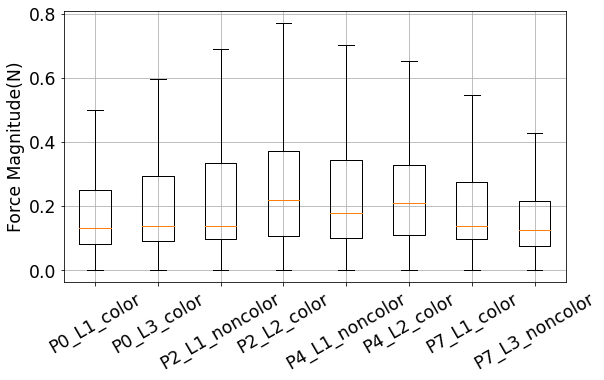

In [7]:
import numpy as np
import numpy.linalg as la

from mergehdf5 import DataMerger
import matplotlib.pyplot as plt

data_merger = DataMerger()
files = []
files.append(['P0_L1_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P0_L1_color/2023-04-13 10:15:01'])
files.append(['P0_L3_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P0_L3_color/2023-04-13 10:51:15'])
# files.append(['P5', '/home/amunawa2/RedCap/Guidance/Participant_5/2022-11-10 13:14:55'])
files.append(['P2_L1_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P2_L1_no_color/2023-04-13 10:23:43'])
files.append(['P2_L2_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P2_L2_color/2023-04-13 10:38:13'])
files.append(['P4_L1_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P4_L1_no_color/2023-04-13 10:19:26'])
files.append(['P4_L2_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P4_L2_color/2023-04-13 10:08:49'])
files.append(['P7_L1_color', '/Users/wangyi/Downloads/Source_Data/cxoxe_P7_L1_color/2023-04-13 10:48:22'])
files.append(['P7_L3_noncolor', '/Users/wangyi/Downloads/Source_Data/cxoxe_P7_L3_no_color/2023-04-13 10:28:22'])
mags = []

x_labels = []
for lab, fl in files:
    data = data_merger.get_merged_data(fl)

    try:
        force_data = data['drill_force_feedback']['wrench'][:, :3]

        m = np.zeros([force_data.shape[0]])

        for i, force_data in enumerate(force_data):
            m[i] = la.norm(force_data)
        mags.append(m)
        x_labels.append(lab)
    except Exception as e:
        print(e)

params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (9, 5),
    "axes.labelsize": "xx-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
}

plt.rcParams.update(params)

fig = plt.figure()
# sns.boxplot(x="Forces", y="Magnitude", data=mags, showfliers=False)
ax = fig.add_subplot(111)
ax.boxplot(mags, showfliers=False)
plt.xticks(np.arange(1, len(x_labels)+1), x_labels, rotation=30)
# ax.set_xlabel(x_labels)
ax.set_ylabel('Force Magnitude(N)')
plt.grid(True)
plt.show()